In [2]:
class Data_processing():
    def __init__(self, path):
        self.path = path

    def get_all_file(self):  # 获取文件夹中的所有文件名称
        files = os.listdir(path)
        files.sort(key=lambda x: int(x[4:-4]))
        s = []
        for file in files:
            if not os.path.isdir(path + file):  # 判断该文件是否是一个文件夹
                f_name = str(file)
                #             print(f_name)
                tr = '\\'
                filename = path + tr + f_name
                s.append(filename)  # 把当前文件名返加到列表里
        return s

    def get_data(self, i):  # 获得相应的数据
        list = self.get_all_file()
        data = pd.read_csv(list[i - 1], names=['Fx', 'Fy', 'Fz', 'Ax', 'Ay', 'Az', 'AE_rms'])
        return data

    def get_feature(self, i, column_num):  # 提取第i个文件第n列的特征
        data = self.get_data(i=i)
        data = data.iloc[:, column_num]  # 1.使用全部数据集，2.使用10万个数据量
        size = data.size
        # 绝对均值1
        absolute_mean_value = np.sum(np.fabs(data)) / size
        # 峰值2
        max = np.max(data)
        # 均方根值3
        root_mean_score = np.sqrt(np.sum(np.square(data)) / size)
        # 方根幅值4
        Root_amplitude = np.square(np.sum(np.sqrt(np.fabs(data))) / size)
        # 歪度值5
        skewness = np.sum(np.power((np.fabs(data) - absolute_mean_value), 3)) / size
        # 峭度值6
        Kurtosis_value = np.sum(np.power(data, 4)) / size
        # 波形因子7
        shape_factor = root_mean_score / absolute_mean_value
        # 脉冲因子8
        pulse_factor = max / absolute_mean_value
        # 歪度因子9
        skewness_factor = skewness / np.power(root_mean_score, 3)
        # 峰值因子10
        crest_factor = max / root_mean_score
        # 裕度因子11
        clearance_factor = max / Root_amplitude
        # 峭度因子12
        Kurtosis_factor = Kurtosis_value / np.power(root_mean_score, 4)
        
        
        
        # 频域
        data_fft = np.fft.fft(data)
        Y = np.abs(data_fft)
        freq = np.fft.fftfreq(size, 1 / 50000)
        ps = Y ** 2 / size
        # 重心频率
        FC = np.sum(freq * ps) / np.sum(ps)
        # 均方频率
        MSF = np.sum(ps * np.square(freq)) / np.sum(ps)
        # 均方根频率
        RMSF = np.sqrt(MSF)
        # 频率方差
        VF = np.sum(np.square(freq - FC) * ps) / np.sum(ps)

        # 时频域
        wp = pywt.WaveletPacket(data, wavelet='db3', mode='symmetric', maxlevel=3)
        aaa = wp['aaa'].data
        aad = wp['aad'].data
        ada = wp['ada'].data
        add = wp['add'].data
        daa = wp['daa'].data
        dad = wp['dad'].data
        dda = wp['dda'].data
        ddd = wp['ddd'].data
        ret1 = np.linalg.norm(aaa, ord=None)
        ret2 = np.linalg.norm(aad, ord=None)
        ret3 = np.linalg.norm(ada, ord=None)
        ret4 = np.linalg.norm(add, ord=None)
        ret5 = np.linalg.norm(daa, ord=None)
        ret6 = np.linalg.norm(dad, ord=None)
        ret7 = np.linalg.norm(dda, ord=None)
        ret8 = np.linalg.norm(ddd, ord=None)
        
        
        
        

        f = [absolute_mean_value, max, root_mean_score, Root_amplitude, skewness, Kurtosis_value,
             shape_factor, pulse_factor, skewness_factor, crest_factor, clearance_factor, Kurtosis_factor,
             FC, MSF, RMSF, VF,
             ret1, ret2, ret3, ret4, ret5, ret6, ret7, ret8]

        return f

    def get_all_feature(self):
        features = np.empty([315, 6, 24])
        for i in range(315):
            for j in range(6):
                features[i, j, :] = self.get_feature(i, j)
        return features

    def get_label(self, filename=None):
        data = pd.read_csv(filename)
        y1 = np.array(data['flute_1'])
        y2 = np.array(data['flute_2'])
        y3 = np.array(data['flute_3'])
        y1 = y1.reshape(y1.shape[0], 1)
        y2 = y2.reshape(y2.shape[0], 1)
        y3 = y3.reshape(y3.shape[0], 1)
        y = np.concatenate((y1, y2, y3), axis=1)
        ya = np.mean(y, 1)
        return ya


In [3]:
def plot_features(data, column_num):  # column_num∈[1, 6]
    features = data[:, column_num-1, :]
    x1 = range(0, features.shape[0])
    plt.figure(num=0, figsize=(12, 5))
    plt.plot(x1, features[:, 0], '-g', label='Absolute mean')
    plt.plot(x1, features[:, 1], '--c', label='Max')
    plt.plot(x1, features[:, 2], '-.k', label='Root mean square')
    plt.plot(x1, features[:, 3], ':r', label='Square root amplitude')
    plt.plot(x1, features[:, 4], '-y', label='Skewness')
    plt.plot(x1, features[:, 5], '-m', label='Kurtosis')
    plt.plot(x1, features[:, 6], '-og', label='Shape factor')
    plt.plot(x1, features[:, 7], '-*c', label='Pulse factor')
    plt.plot(x1, features[:, 8], '-xk', label='Skewness factor')
    plt.plot(x1, features[:, 9], '-vr', label='Crest factor')
    plt.plot(x1, features[:, 10], '-sy', label='Clearance factor')
    plt.plot(x1, features[:, 11], '-+c', label='Kurtosis factor')
    plt.xlabel('Times of cutting')
    plt.ylabel('Time domain features')
    plt.legend(loc=1)
    plt.show()
    plt.figure(num=1, figsize=(12, 5))
    plt.plot(x1, features[:, 12], '-vr', label='FC')
    plt.plot(x1, features[:, 13], '-k', label='MSF')
    plt.plot(x1, features[:, 14], '-xk', label='RMSF')
    plt.plot(x1, features[:, 15], '-og', label='VF')
    plt.xlabel('Times of cutting')
    plt.ylabel('Frequency domain features')
    plt.legend(loc=1)
    plt.show()
    plt.figure(num=2, figsize=(12, 5))
    plt.plot(x1, features[:, 16], '-g', label='Feature 1')
    plt.plot(x1, features[:, 17], '--c', label='Feature 2')
    plt.plot(x1, features[:, 18], '-.k', label='Feature 3')
    plt.plot(x1, features[:, 19], ':r', label='Feature 4')
    plt.plot(x1, features[:, 20], '-y', label='Feature 5')
    plt.plot(x1, features[:, 21], '-og', label='Feature 6')
    plt.plot(x1, features[:, 22], '-*c', label='Feature 7')
    plt.plot(x1, features[:, 23], '-vr', label='Feature 8')
    plt.xlabel('Times of cutting')
    plt.ylabel('Time-frequency domain features')
    plt.legend(loc=1)
    plt.show()


data_x1: (315, 6, 24) data_y1: (315,)


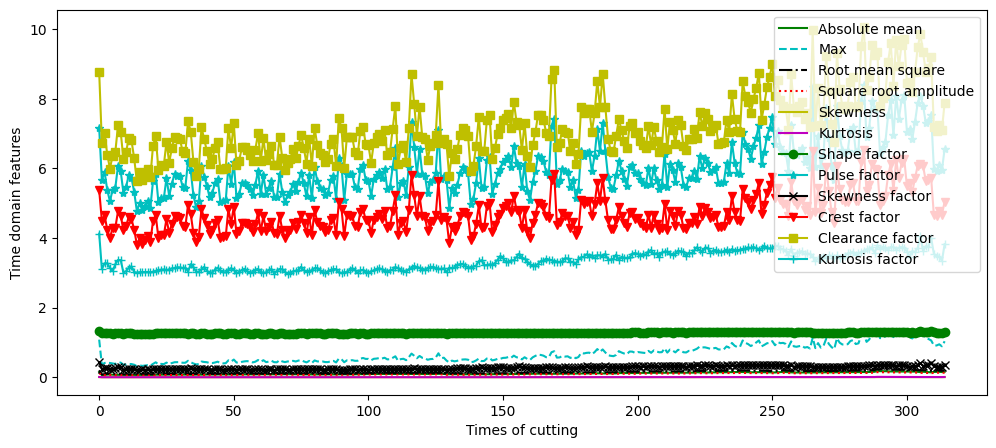

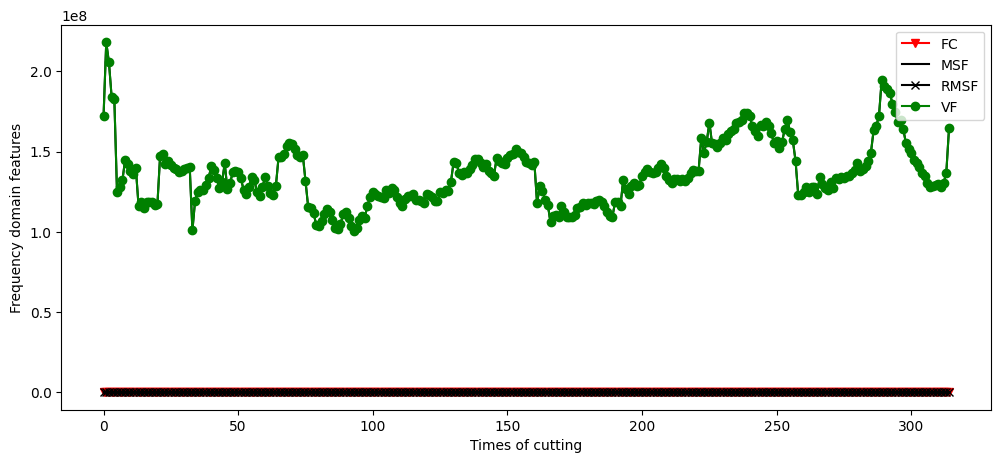

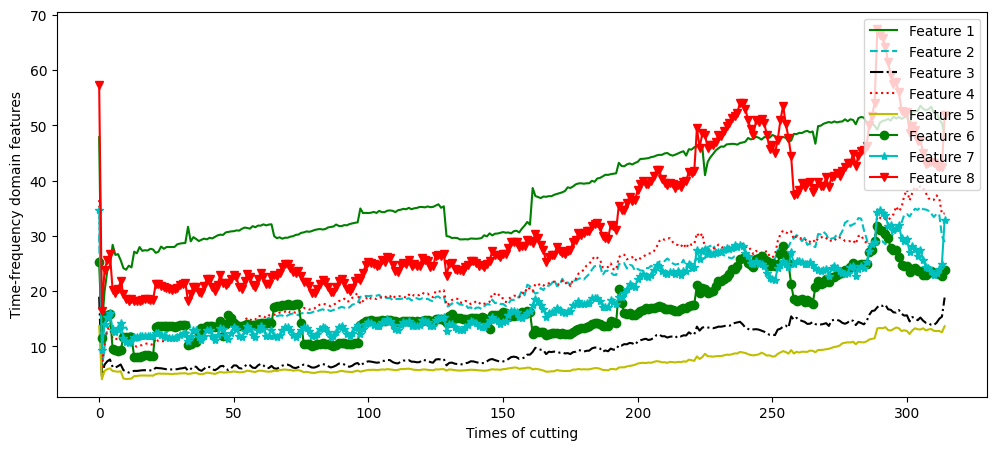

In [4]:
path = r'G:\刀具预测\原始数据集\c1\c1'
file1 = r'G:\刀具预测\原始数据集\c1\c1_wear.csv'
Data1 = Data_processing(path)
data_x1 = Data1.get_all_feature()
data_y1 = Data1.get_label(file1)
print('data_x1:', data_x1.shape, 'data_y1:', data_y1.shape)
plot_features(data_x1, 0)


In [9]:
np.save("G:\刀具预测\原始数据集\c1\\data_x1.npy", data_x1)
np.save("G:\刀具预测\原始数据集\c1\\data_y1.npy", data_y1)


data_x4: (315, 6, 24) data_y4: (315,)


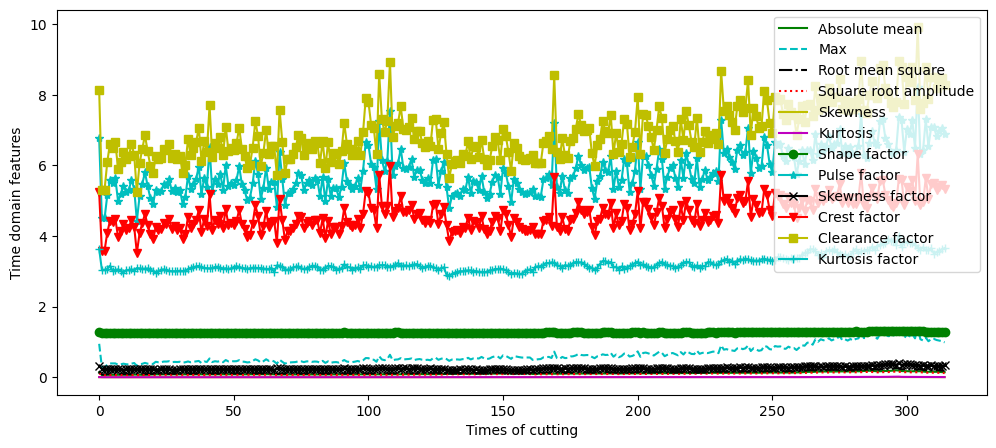

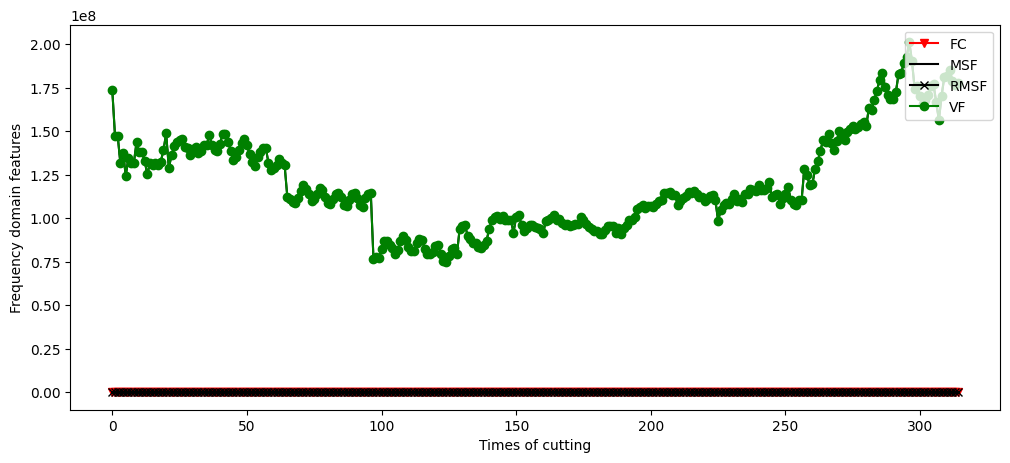

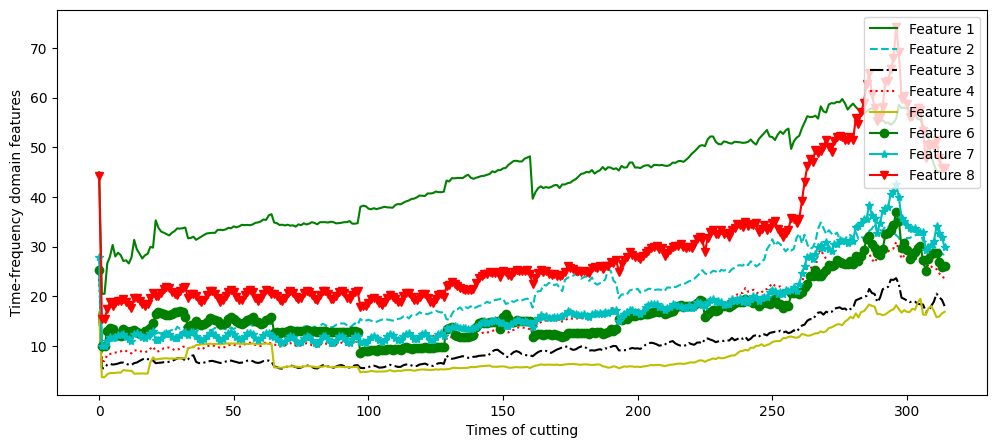

In [6]:
path = r'G:\刀具预测\原始数据集\c4\c4'
file4 = r'G:\刀具预测\原始数据集\c4\c4_wear.csv'
Data4 = Data_processing(path)
data_x4 = Data1.get_all_feature()
data_y4 = Data1.get_label(file4)
print('data_x4:', data_x4.shape, 'data_y4:', data_y4.shape)
plot_features(data_x4, 0)

In [11]:
np.save("G:\刀具预测\原始数据集\c4\\data_x4.npy", data_x4)
np.save("G:\刀具预测\原始数据集\c4\\data_y4.npy", data_y4)

data_x6: (315, 6, 24) data_y6: (315,)


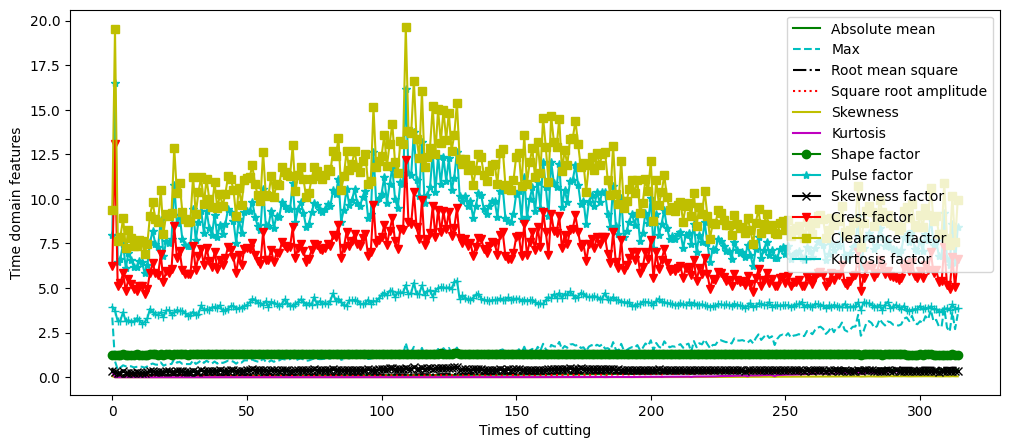

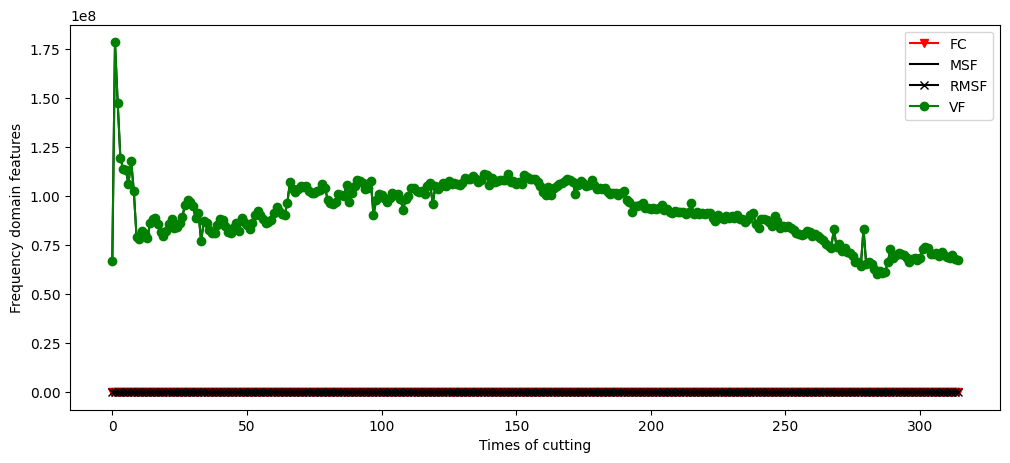

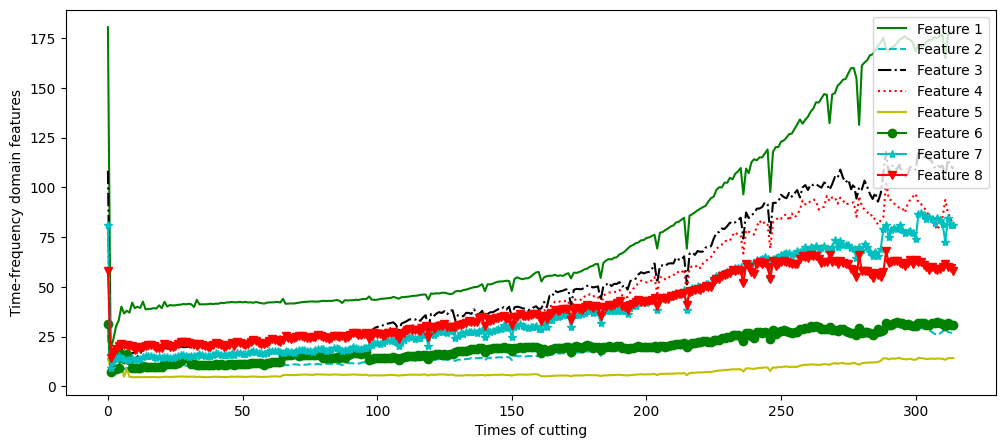

In [15]:
path = r'G:\刀具预测\原始数据集\c6\c6'
file6 = r'G:\刀具预测\原始数据集\c6\c6_wear.csv'
Data6 = Data_processing(path)
data_x6 = Data1.get_all_feature()
data_y6 = Data1.get_label(file6)
print('data_x6:', data_x6.shape, 'data_y6:', data_y6.shape)
plot_features(data_x6, 0)

In [16]:
np.save("G:\刀具预测\原始数据集\c6\\data_x6.npy", data_x6)
np.save("G:\刀具预测\原始数据集\c6\\data_y6.npy", data_y6)